<a href="https://colab.research.google.com/github/TMKarunarathne/FYP/blob/main/cell_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy.io
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive
Mounted at /content/gdrive


In [ ]:
rand_state =1000
mat_file = '/content/gdrive/MyDrive/Data_Set/FV_10000x8928_01.mat'
mat = scipy.io.loadmat(mat_file)

df1= pd.DataFrame(mat['df'])
df1 = df1.drop(df1.columns[[0]], axis=1)
df1=df1.iloc[:,1:]
col = [i for i in range(1,10001)]
df1 = df1.set_axis(col, axis=1)
dates_x = pd.to_datetime(pd.DataFrame(mat['df'])[1], unit="s")
df1.set_index(dates_x,inplace=True)
df1.index.freq = '10min'
df1.head(5)

,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
1,,,,,,,,,,,,,,,,,,,,,
2013-10-31 23:00:00,11.028366,11.058225,11.090008,10.941881,9.916548,11.090008,11.090008,11.090008,11.090008,6.374815,...,87.475471,62.583127,23.796852,20.001131,29.757764,37.990080,40.455439,40.051989,26.016274,19.359289
2013-10-31 23:10:00,11.127101,11.167926,11.211383,11.008849,9.987806,11.211383,11.211383,11.211383,11.211383,6.553571,...,82.440390,57.532262,19.081251,15.228796,29.415636,39.170855,39.293431,39.382781,25.436478,13.895724
2013-10-31 23:20:00,10.892771,10.915638,10.939979,10.826535,9.772990,10.939979,10.939979,10.939979,10.939979,6.068525,...,65.302247,51.335307,30.175465,27.837597,27.419090,29.319222,32.648722,31.970062,19.030127,15.018573
2013-10-31 23:30:00,8.622425,8.626340,8.630509,8.611082,7.860796,8.630509,8.630509,8.630509,8.630509,5.119293,...,54.094600,44.974487,30.069374,26.188857,29.412667,34.141095,37.662177,36.984591,20.578716,13.234179
2013-10-31 23:40:00,8.009927,8.020256,8.031251,7.980009,7.263837,8.031251,8.031251,8.031251,8.031251,4.702058,...,58.119518,43.981767,22.195527,19.334859,38.768943,51.147670,50.005736,50.398211,32.289851,14.408410


# **K-MEANS CLUSTERING**

In [ ]:
mean=[]
std=[]

for i in range(10000):
  temp_df = df1[i+1].values
  temp_mean = np.mean(temp_df) 
  temp_std = np.std(temp_df)
  mean.append(temp_mean)
  std.append(temp_std)

In [ ]:
index = [i+1 for i in range(10000)]
df_ms= pd.DataFrame(list(zip(mean, std)),index=index,columns=['mean','std'])
df_ms

,mean,std
1,10.415845,3.370539
2,10.457929,3.386785
3,10.502725,3.404287
4,10.293950,3.324584
5,9.367238,2.992896
...,...,...
9996,37.476699,12.583810
9997,41.404020,13.331453
9998,40.672262,13.120893
9999,25.163609,8.984312


In [ ]:
df_ms.describe()

,mean,std
count,10000.000000,10000.000000
mean,62.196412,30.753813
std,99.977110,61.775247
min,0.077420,0.111975
25%,13.228269,5.505114
50%,31.123555,13.446846
75%,64.728452,28.854024
max,1426.978085,1381.571829


In [ ]:
X = df_ms.iloc[:, [0,1]].values

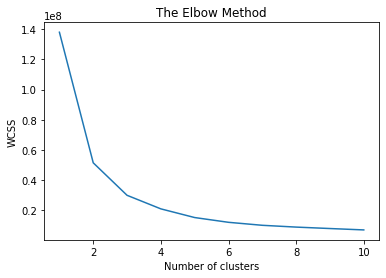

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

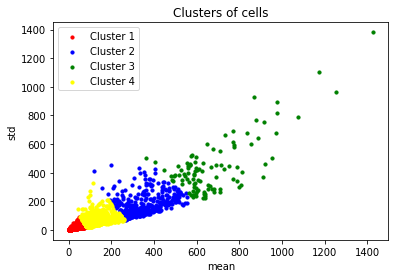

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'yellow', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'yellow', label = 'Cluster 5')
plt.title('Clusters of cells')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.show()

In [ ]:
clusters=pd.DataFrame(list(zip(y_kmeans, index)),index=index,columns=['cluster','cell_NO'])
clusters

,cluster,cell_NO
1,0,1
2,0,2
3,0,3
4,0,4
5,0,5
...,...,...
9996,0,9996
9997,0,9997
9998,0,9998
9999,0,9999


In [ ]:
cluster0=clusters[clusters['cluster']==0]['cell_NO']
cluster1=clusters[clusters['cluster']==1]['cell_NO']
cluster2=clusters[clusters['cluster']==2]['cell_NO']

In [ ]:
# Make a 100x100 grid...
nrows, ncols = 100,100
image = np.zeros(nrows*ncols,dtype = float)
image.shape

(10000,)

In [ ]:
for i in range(100):
    for j in range(100):
      if int(clusters.loc[10000-(100*(i+1))+j+1]['cluster']) == 0:
        image[(100*i)+j]=200
      elif int(clusters.loc[10000-(100*(i+1))+j+1]['cluster']) == 1:
        image[(100*i)+j]=400
      elif int(clusters.loc[10000-(100*(i+1))+j+1]['cluster']) == 2:
        image[(100*i)+j]=800
      elif int(clusters.loc[10000-(100*(i+1))+j+1]['cluster']) == 3:
        image[(100*i)+j]=1000
      #elif int(clusters.loc[10000-(100*(i+1))+j+1]['cluster']) == 4:
        #image[(100*i)+j]=1200

In [ ]:
image = image.reshape((nrows, ncols))
image

array([[200., 200., 200., ..., 200., 200., 200.],
       [200., 200., 200., ..., 200., 200., 200.],
       [200., 200., 200., ..., 200., 200., 200.],
       ...,
       [200., 200., 200., ..., 200., 200., 200.],
       [200., 200., 200., ..., 200., 200., 200.],
       [200., 200., 200., ..., 200., 200., 200.]])

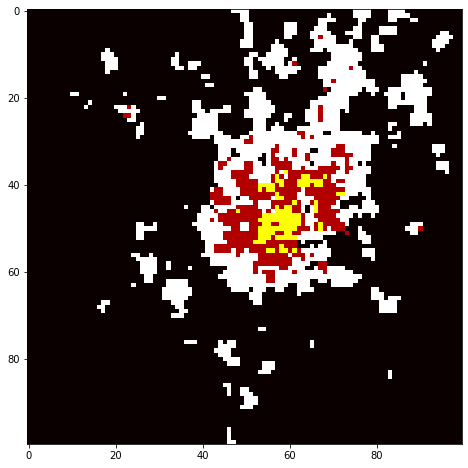

In [ ]:
f=plt.figure(figsize=(10,8))
plt.imshow(image,cmap='hot')
plt.show()

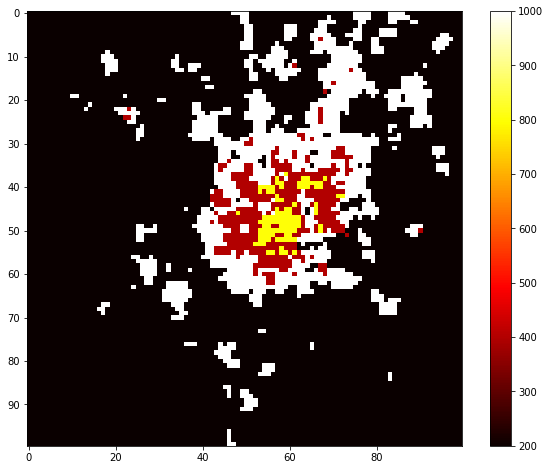

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
c = ax.matshow(image,interpolation ='nearest',cmap='hot')
fig.colorbar(c, ax = ax)
ax.set_xticks(np.arange(0,99,20))
ax.xaxis.set_ticks_position("bottom")
ax.set_yticks(np.arange(0,99,10))

In [ ]:
#finding what cluster
cellno = 3189
clusters.loc[cellno]['cluster']

0

# **GAUSIAN MIXTURE MODEL CLUSTERING**

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6)
gmm.fit(X)

GaussianMixture(n_components=6)

In [ ]:
#predictions from kmeans
pred = gmm.predict(X)
frame = pd.DataFrame(list(zip(pred, index)),index=index,columns=['cluster','cell_NO'])

In [ ]:
frame

,cluster,cell_NO
1,0,1
2,0,2
3,0,3
4,0,4
5,0,5
...,...,...
9996,4,9996
9997,4,9997
9998,4,9998
9999,4,9999


In [ ]:
frame[frame['cluster']==4]['cell_NO']

49          49
54          54
55          55
61          61
62          62
         ...  
9996      9996
9997      9997
9998      9998
9999      9999
10000    10000
Name: cell_NO, Length: 3486, dtype: int64

In [ ]:
# Make a 100x100 grid...
nrows, ncols = 100,100
image = np.zeros(nrows*ncols,dtype = float)
image.shape

(10000,)

In [ ]:
for i in range(100):
    for j in range(100):
      if int(frame.loc[10000-(100*(i+1))+j+1]['cluster']) == 0:
        image[(100*i)+j]=0
      elif int(frame.loc[10000-(100*(i+1))+j+1]['cluster']) == 1:
        image[(100*i)+j]=200
      elif int(frame.loc[10000-(100*(i+1))+j+1]['cluster']) == 2:
        image[(100*i)+j]=400
      elif int(frame.loc[10000-(100*(i+1))+j+1]['cluster']) == 3:
        image[(100*i)+j]=600
      elif int(frame.loc[10000-(100*(i+1))+j+1]['cluster']) == 4:
        image[(100*i)+j]=800
      elif int(frame.loc[10000-(100*(i+1))+j+1]['cluster']) == 5:
        image[(100*i)+j]=1000

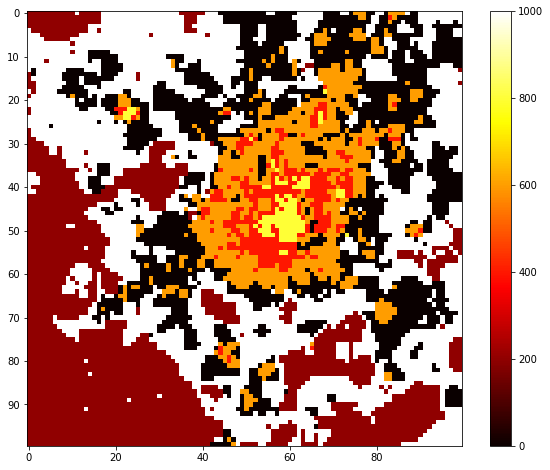

In [ ]:
image = image.reshape((nrows, ncols))

fig, ax = plt.subplots(figsize=(10,8))
c = ax.matshow(image,interpolation ='nearest',cmap='hot')
fig.colorbar(c, ax = ax)
ax.set_xticks(np.arange(0,99,20))
ax.xaxis.set_ticks_position("bottom")
ax.set_yticks(np.arange(0,99,10))

In [ ]:
#finding what cluster
cellno = 7382
frame.loc[cellno]['cluster']

1

In [ ]:
#frame.to_csv('/content/gdrive/MyDrive/Data_Set/clusters_GMM.csv')